In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
#read data from 3 csv files
ad_feature=pd.read_csv('ad_feature.csv')
user_profile=pd.read_csv('user_profile.csv')
raw_sample=pd.read_csv('raw_sample.csv')      

In [8]:
raw_sample.head()

,user,time_stamp,adgroup_id,pid,nonclk,clk
0,581738,1494137644,1,430548_1007,1,0
1,449818,1494638778,3,430548_1007,1,0
2,914836,1494650879,4,430548_1007,1,0
3,914836,1494651029,5,430548_1007,1,0
4,399907,1494302958,8,430548_1007,1,0


In [5]:
#select 30000 users' profile infomation and drop NA infomation
user_30000=user_profile[user_profile['userid']<30001].set_index('userid').sort_index()
user_s=user_30000.drop(columns=['pvalue_level']).dropna()

#select 30000 users' raw sample infomation and drop NA infomation
raw_30000=raw_sample[raw_sample['user']<30001].set_index('user').sort_index()
raw_s=raw_30000.dropna()

##Match users' information from 3 files whose userid <30001
userid_adfeature_30000=raw_s.join(user_s).dropna()
userid_adfeature_30000=userid_adfeature_30000.reset_index()
userid_adfeature_30000.rename(columns={'index':'user_id'},inplace=True)
a=userid_adfeature_30000.drop(columns={'nonclk'})

forfitting_30000=a.merge(ad_feature,how='left',on='adgroup_id')
forfitting_30000


#(1) user_id：脱敏过的用户ID；
#(2) time_stamp：时间戳；
#(3) adgroup_id：脱敏过的广告单元ID；
#(4) pid：资源位；
#(5) clk：为0代表没有点击；为1代表点击
#(6) cms_segid：微群ID；
#(7) cms_group_id：cms_group_id；
#(8) final_gender_code：性别 1:男,2:女；
#(9) age_level：年龄层次；
#(10) shopping_level：购物深度，1:浅层用户,2:中度用户,3:深度用户
#(11) occupation：是否大学生 ，1:是,0:否
#(12) new_user_class_level：城市层级
#(13) cate_id：脱敏过的商品类目ID；
#(14) campaign_id：脱敏过的广告计划ID；
#(15) customer_id:脱敏过的广告主ID；
#(16) brand：脱敏过的品牌ID；
#(17) price: 宝贝的价格
#其中一个广告ID对应一个商品（宝贝），一个宝贝属于一个类目，一个宝贝属于一个品牌

,user_id,time_stamp,adgroup_id,pid,clk,cms_segid,cms_group_id,final_gender_code,age_level,shopping_level,occupation,new_user_class_level,cate_id,campaign_id,customer,brand,price
0,1,1494571525,142774,430548_1007,0,92.0,11.0,1.0,5.0,3.0,0.0,3.0,6614,243257,65365,115491.0,138.00
1,1,1494478236,752759,430548_1007,0,92.0,11.0,1.0,5.0,3.0,0.0,3.0,37,105991,143795,NaN,4999.00
2,1,1494571525,133190,430548_1007,0,92.0,11.0,1.0,5.0,3.0,0.0,3.0,37,182799,167997,169635.0,2560.00
3,1,1494571525,769066,430548_1007,0,92.0,11.0,1.0,5.0,3.0,0.0,3.0,6614,190882,182039,45145.0,999.00
4,2,1494250392,258454,430539_1007,0,0.0,10.0,1.0,4.0,3.0,0.0,2.0,8845,141066,179158,211183.0,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503642,30000,1494152866,513233,430539_1007,0,5.0,2.0,2.0,2.0,3.0,1.0,2.0,4520,255400,98731,277442.0,139.00
503643,30000,1494159795,726665,430539_1007,0,5.0,2.0,2.0,2.0,3.0,1.0,2.0,4283,107191,125193,NaN,38.88
503644,30000,1494242748,639024,430539_1007,0,5.0,2.0,2.0,2.0,3.0,1.0,2.0,4520,212864,104470,NaN,29.80
503645,30000,1494152866,622217,430539_1007,0,5.0,2.0,2.0,2.0,3.0,1.0,2.0,4520,137887,14258,NaN,75.00


In [42]:
d = pd.get_dummies(dataset["position_type"])
d= d.drop('430548_1007',axis=1)
d=d.rename(columns={'430539_1007':"ad_position_type"})
dataset = pd.concat([dataset,d],axis=1)
dataset.drop(columns=["position_type"],inplace=True)

,click,cms_group_id,gender,age_level,shopping_level,occupation,new_user_class_level,price,ad_position_type
0,0,11.0,1.0,5.0,3.0,0.0,3.0,138.0,0
1,0,11.0,1.0,5.0,3.0,0.0,3.0,4999.0,0
2,0,11.0,1.0,5.0,3.0,0.0,3.0,2560.0,0
3,0,11.0,1.0,5.0,3.0,0.0,3.0,999.0,0
4,0,10.0,1.0,4.0,3.0,0.0,2.0,5.0,1
...,...,...,...,...,...,...,...,...,...
29995,0,3.0,2.0,3.0,3.0,0.0,2.0,229.0,1
29996,0,3.0,2.0,3.0,3.0,0.0,2.0,538.0,1
29997,0,3.0,2.0,3.0,3.0,0.0,2.0,949.0,1
29998,0,3.0,2.0,3.0,3.0,0.0,2.0,198.0,1


In [43]:
dataset.to_csv("dataset.csv")

In [41]:
dataset = forfitting_30000.iloc[0:30000,:]
print(dataset.nunique(axis=0))
dataset = dataset.drop(columns=["user_id","time_stamp","adgroup_id","cms_segid","cate_id","campaign_id","customer","brand"])
dataset.rename(columns={"pid":"position_type","clk":"click","final_gender_code":"gender","new_user_class_level":"city_level"},inplace=True)

user_id                   1095
time_stamp                7180
adgroup_id               19816
pid                          2
clk                          2
cms_segid                   61
cms_group_id                13
final_gender_code            2
age_level                    7
shopping_level               3
occupation                   2
new_user_class_level         4
cate_id                   1319
campaign_id              16612
customer                 13477
brand                     7585
price                     2074
dtype: int64


In [4]:
#select another 30000 users' profile infomation and drop NA infomation for prediction
user_pre=user_profile[(user_profile['userid']<60001) &( user_profile['userid']>30000)].set_index('userid').sort_index()
user_pres=user_pre.drop(columns=['pvalue_level']).dropna()

#select 30000 users' raw sample infomation and drop NA infomation
raw_pre=raw_sample[(raw_sample['user']<60001) & (raw_sample['user']>30000)].set_index('user').sort_index()
raw_pres=raw_pre.dropna()

##Match users' information from 3 files whose userid <30001
userid_adfeature_pre=raw_pres.join(user_pres).dropna()
userid_adfeature_pre=userid_adfeature_pre.reset_index()
userid_adfeature_pre.rename(columns={'index':'user_id'},inplace=True)
b=userid_adfeature_pre.drop(columns={'nonclk'})

forpre_30000=b.merge(ad_feature,how='left',on='adgroup_id')
forpre_30000


,user_id,time_stamp,adgroup_id,pid,clk,cms_segid,cms_group_id,final_gender_code,age_level,shopping_level,occupation,new_user_class_level,cate_id,campaign_id,customer,brand,price
0,30003,1494067399,779272,430548_1007,0.0,67.0,9.0,1.0,3.0,3.0,0.0,4.0,6142,19386,98510,444434.0,179.0
1,30003,1494543908,779272,430548_1007,0.0,67.0,9.0,1.0,3.0,3.0,0.0,4.0,6142,19386,98510,444434.0,179.0
2,30003,1494547253,832239,430548_1007,0.0,67.0,9.0,1.0,3.0,3.0,0.0,4.0,12544,382897,241105,6749.0,300.0
3,30003,1494668798,161729,430548_1007,0.0,67.0,9.0,1.0,3.0,3.0,0.0,4.0,850,250432,216414,333109.0,14.0
4,30003,1494292535,376391,430548_1007,0.0,67.0,9.0,1.0,3.0,3.0,0.0,4.0,4385,63860,131820,217636.0,139.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423831,59999,1494455339,710164,430548_1007,0.0,0.0,5.0,2.0,5.0,3.0,0.0,2.0,1665,405490,60305,NaN,109.0
423832,60000,1494484420,163145,430539_1007,0.0,0.0,3.0,2.0,3.0,3.0,0.0,1.0,5350,103413,124929,274643.0,252.0
423833,60000,1494647876,259006,430539_1007,0.0,0.0,3.0,2.0,3.0,3.0,0.0,1.0,4312,165430,93475,126014.0,238.0
423834,60000,1494479978,339186,430539_1007,0.0,0.0,3.0,2.0,3.0,3.0,0.0,1.0,5350,306598,241429,344851.0,122.5


<AxesSubplot:xlabel='price', ylabel='Count'>

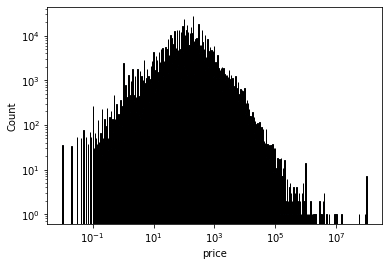

In [5]:
#price distribution of goods
sb.histplot(ad_feature['price'],bins=700,log_scale=[True,True])

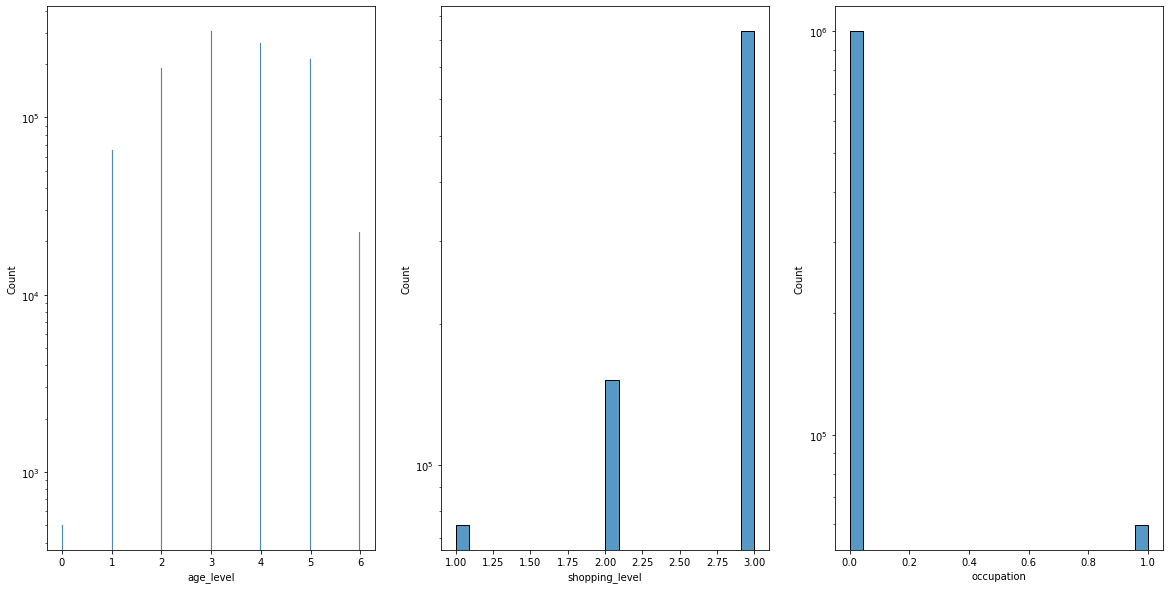

In [6]:
#age distribution of users,should be 0:0-9, 1:10-19, 2:20-29, 3:30-39, 4:40-49, 5:50-59, 6:60-69
#shopping level distribution of users
#occupation distribution of users
fig, ax = plt.subplots(1, 3,figsize=(20,10))

ax[0]=sb.histplot(user_profile['age_level'],ax=ax[0],log_scale=[False,True])
ax[1]=sb.histplot(user_profile['shopping_level'],ax=ax[1],log_scale=[False,True])
ax[2]=sb.histplot(user_profile['occupation'],ax=ax[2],log_scale=[False,True])

fig.show()


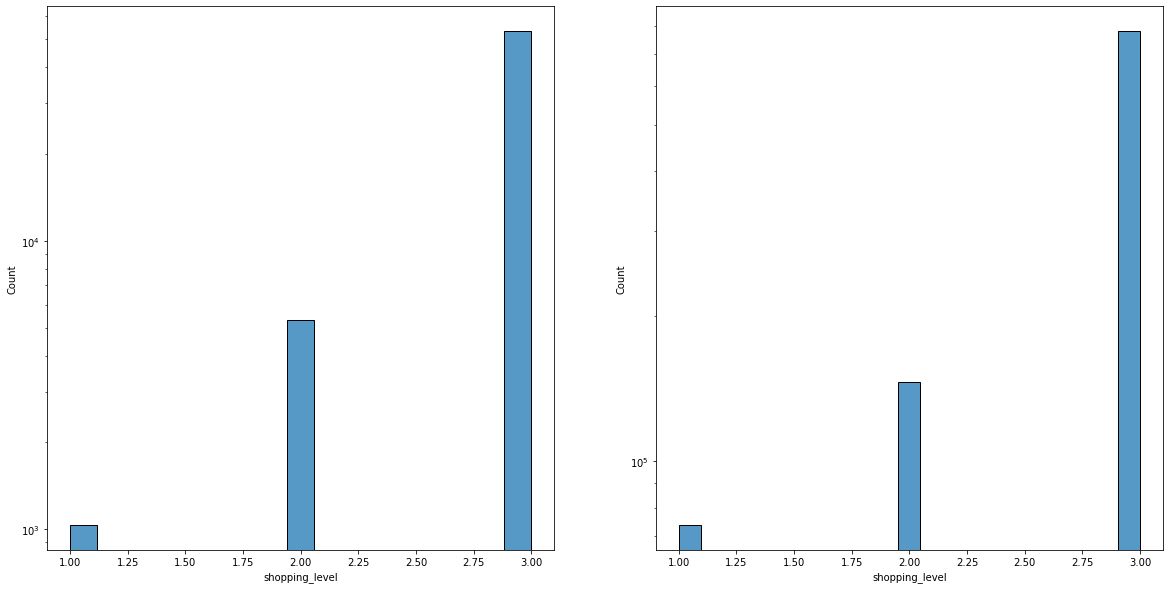

In [7]:
#student shopping level versus non students
user_student=user_profile[user_profile['occupation']==1]
user_nonstudent=user_profile[user_profile['occupation']==0]
fig, ax = plt.subplots(1, 2,figsize=(20,10))

ax[0]=sb.histplot(user_student['shopping_level'],ax=ax[0],log_scale=[False,True])
ax[1]=sb.histplot(user_nonstudent['shopping_level'],ax=ax[1],log_scale=[False,True])

fig.show()


<AxesSubplot:xlabel='time_stamp', ylabel='Count'>

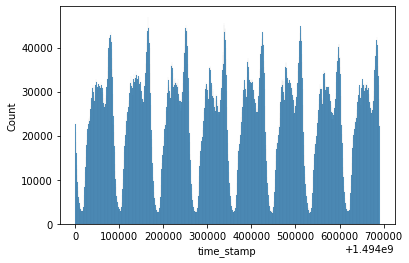

In [8]:
#time distribution of the clicks and nonclicks
sb.histplot(raw_sample['time_stamp'],bins=1000)

<AxesSubplot:xlabel='time_stamp', ylabel='Count'>

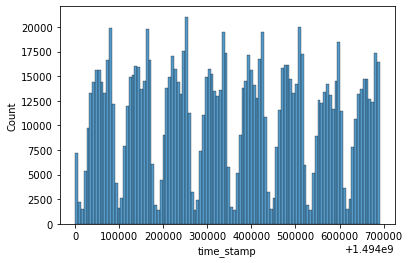

In [9]:
#time distribution of the clicks
raw_clk=raw_sample[raw_sample['clk']==1]
sb.histplot(raw_clk['time_stamp'])